In [1]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import os
import matplotlib
#matplotlib.use('Qt5Agg') 

In [2]:
data_path="D:\IIT\IIT Delhi\\Data\\Chiragg EEG data\\" 
demo_hdr=data_path+"chiraggandhi1.vhdr"
raw1 = mne.io.read_raw_brainvision(demo_hdr, preload=True, verbose=True)

data_path="D:\IIT\IIT Delhi\\Data\\Chiragg EEG data\\" 
demo_hdr=data_path+"chiraggandhi2.vhdr"
raw2 = mne.io.read_raw_brainvision(demo_hdr, preload=True, verbose=True)

Extracting parameters from D:\IIT\IIT Delhi\Data\Chiragg EEG data\chiraggandhi1.vhdr...
Setting channel info structure...


C:\Users\Manish\AppData\Local\Temp\ipykernel_2348\1568116312.py:3: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (131.00 Hz) will be stored.
  raw1 = mne.io.read_raw_brainvision(demo_hdr, preload=True, verbose=True)


Reading 0 ... 103269  =      0.000 ...   206.538 secs...
Extracting parameters from D:\IIT\IIT Delhi\Data\Chiragg EEG data\chiraggandhi2.vhdr...
Setting channel info structure...
Reading 0 ... 99009  =      0.000 ...   198.018 secs...


In [3]:
channel_names = ['FP1', 'FP2']
standard_1020 = mne.channels.make_standard_montage('standard_1020').ch_names
channel_map = {orig: new for orig, new in zip(channel_names, standard_1020)}
raw1.rename_channels(channel_map)
raw2.rename_channels(channel_map)

raw1.set_montage('standard_1020')

raw2.set_montage('standard_1020')

<RawBrainVision | chiraggandhi2.eeg, 67 x 99010 (198.0 s), ~50.7 MB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


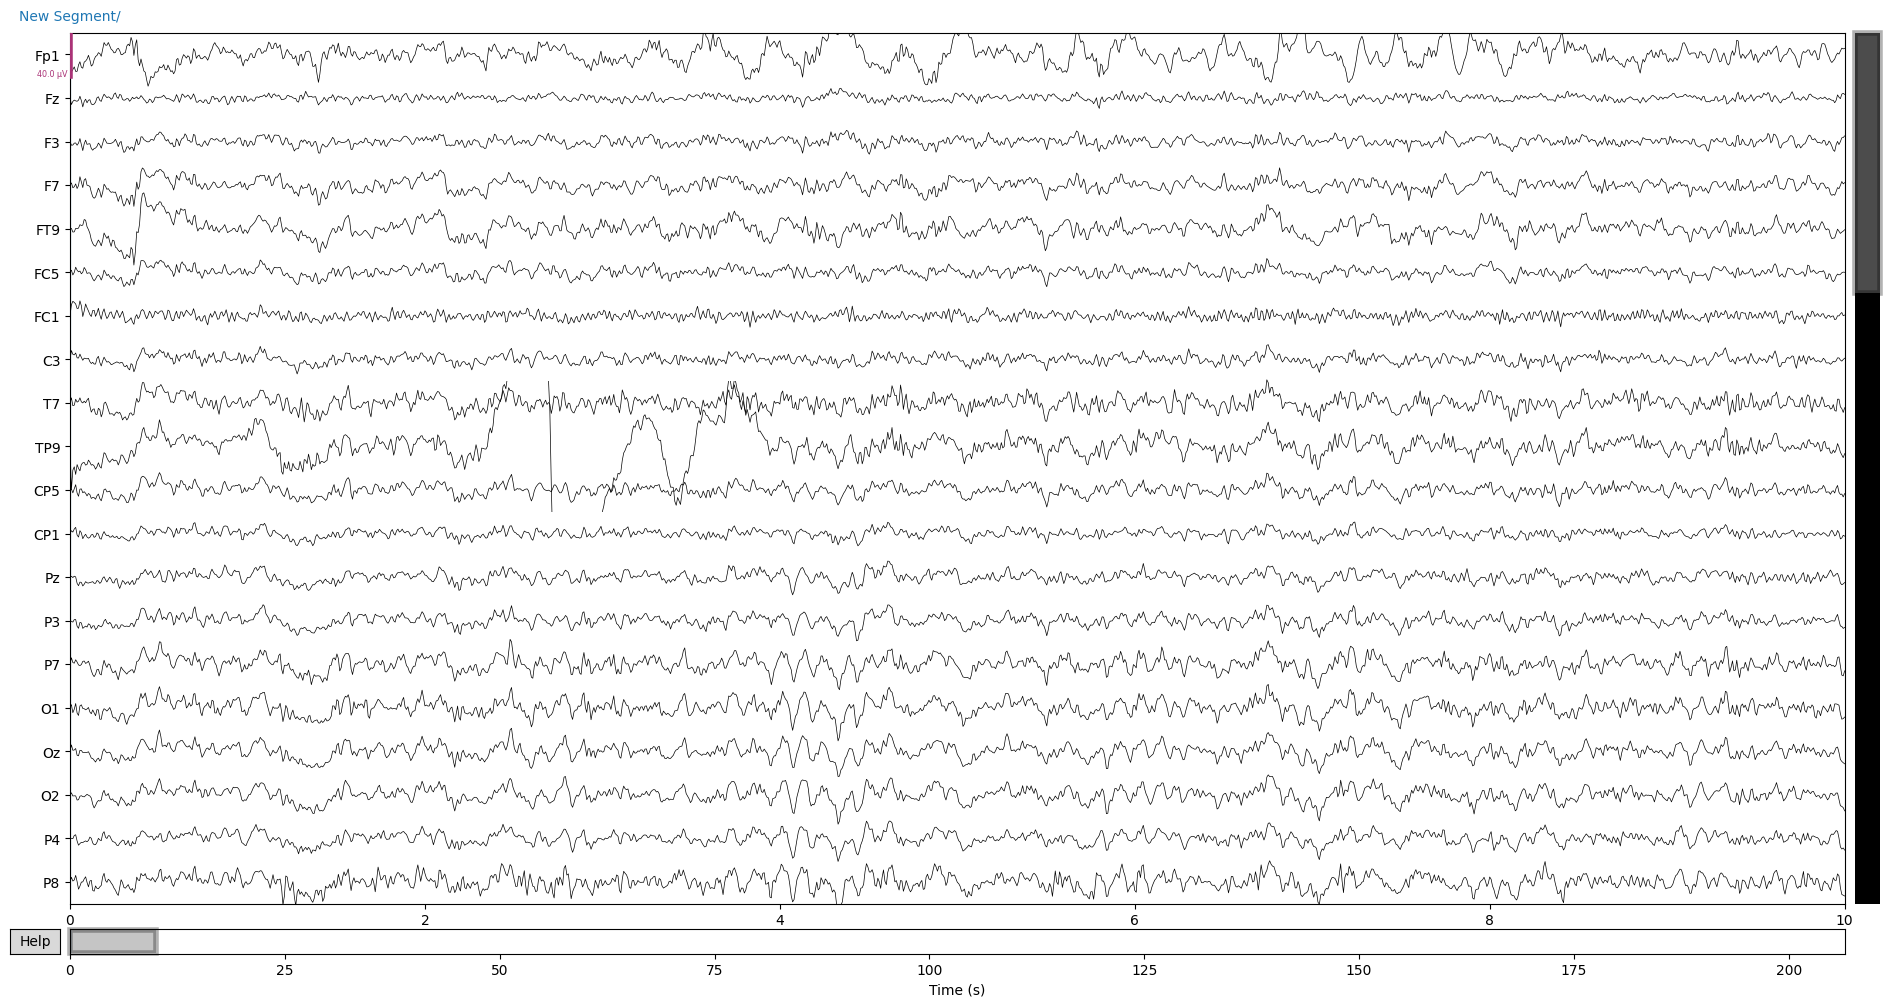

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


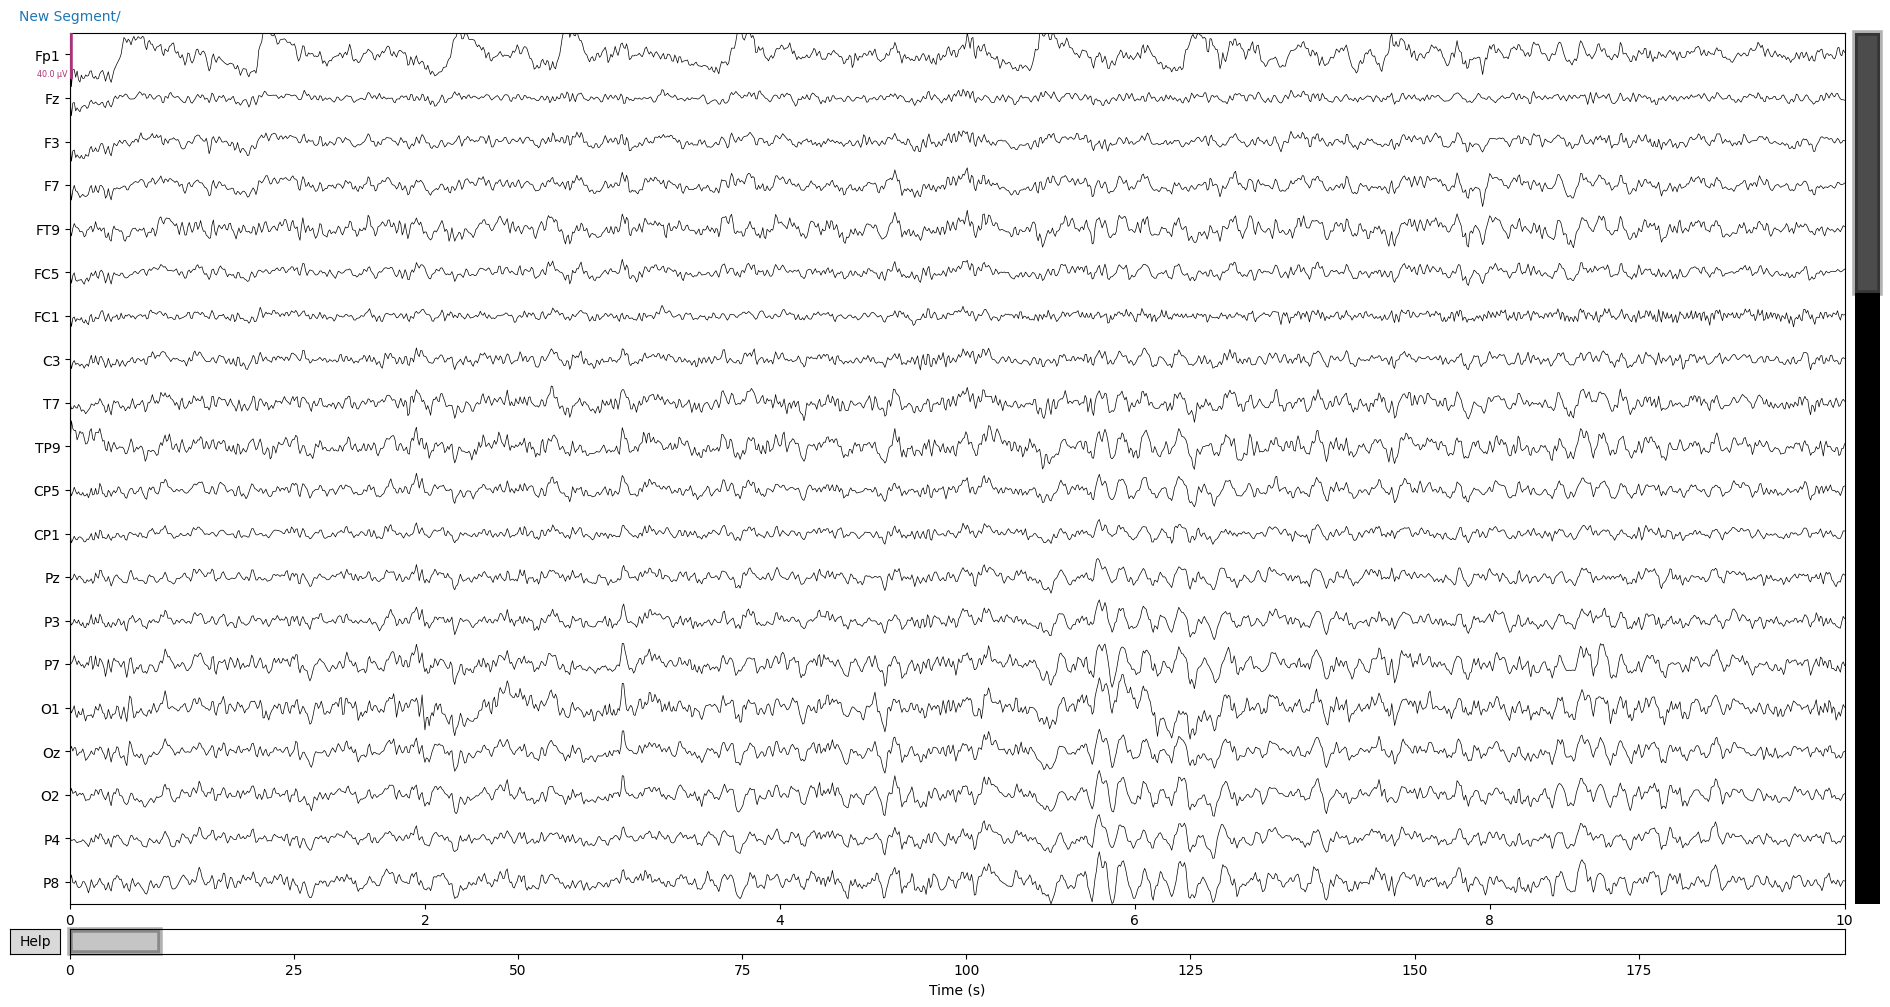

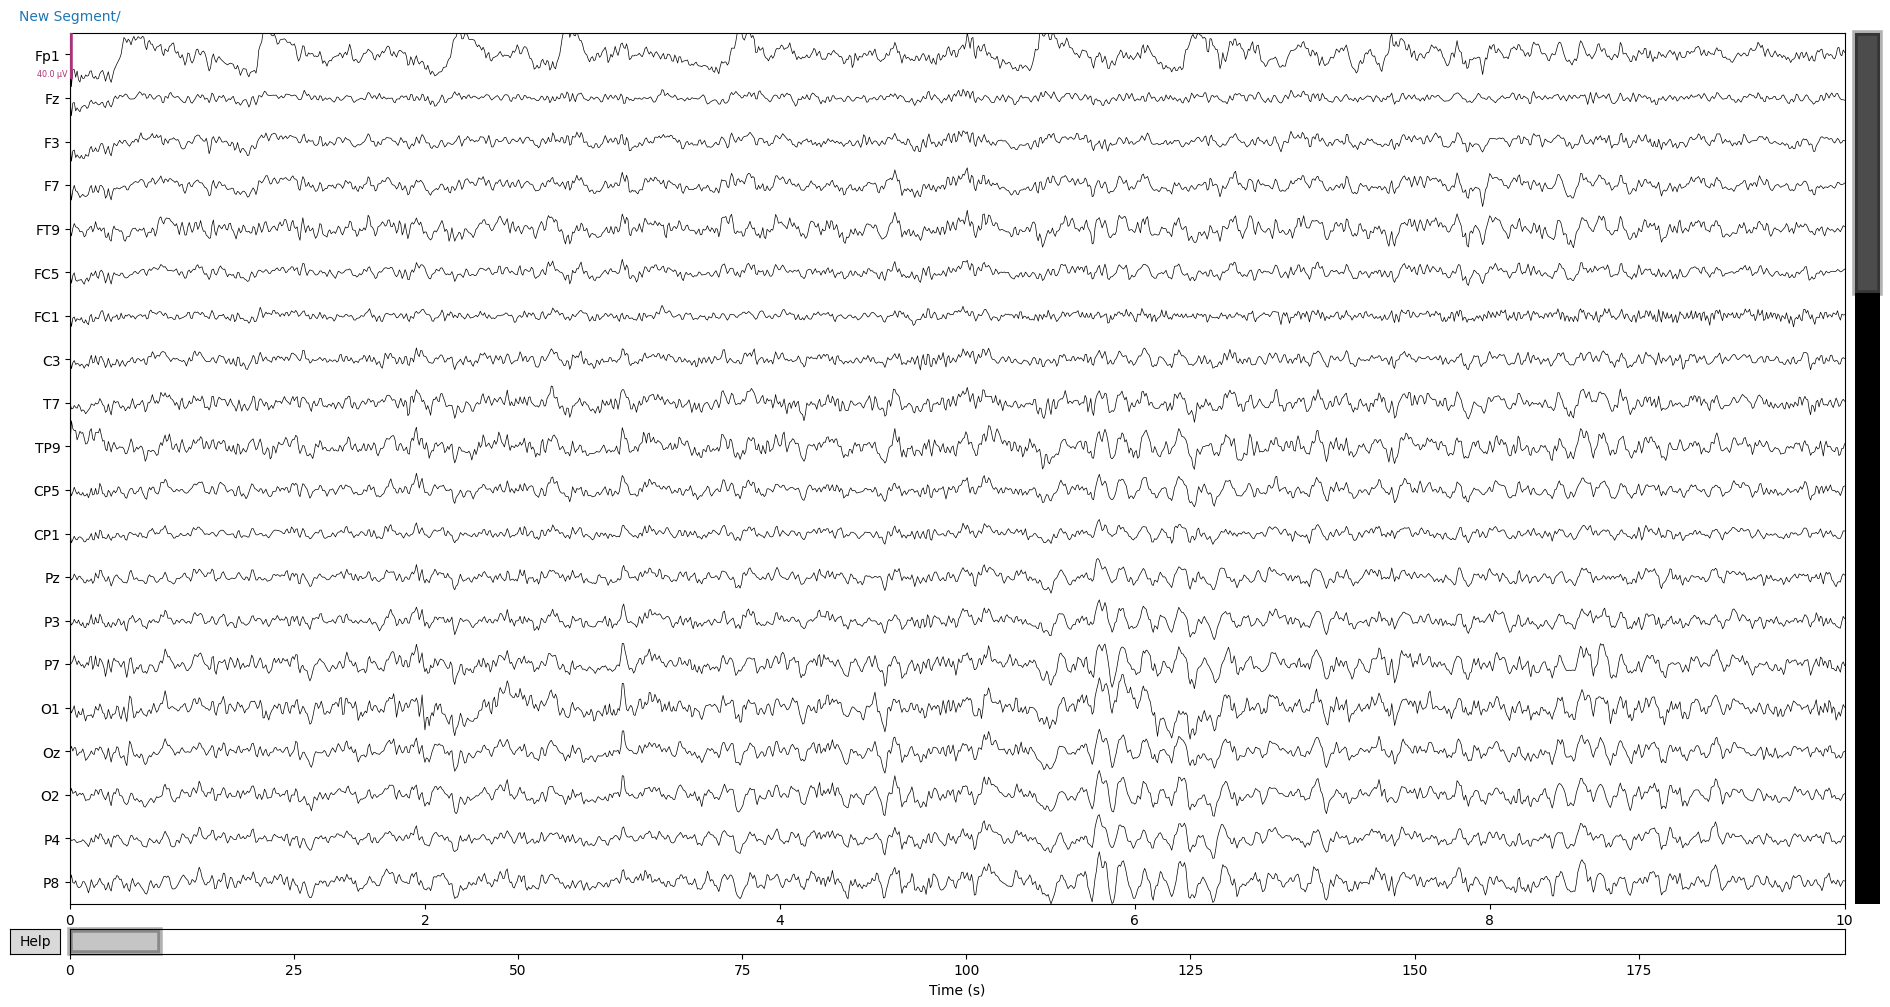

In [4]:
raw1.filter(2, 40)
raw1.plot()
raw2.filter(2, 40)
raw2.plot()

In [6]:
raw1_events = mne.make_fixed_length_events(raw1, id=1, start=0, stop=None, duration=1.0, first_samp=True, overlap=0.0)
raw2_events=mne.make_fixed_length_events(raw2, id=1, start=0, stop=None, duration=1.0, first_samp=True, overlap=0.0)

event_dict1 = {'one': 1}

print("faf")
event_dict2 = {'one': 1}

epochs1 = mne.Epochs(raw1, raw1_events, event_id=event_dict1,
                     preload=True)
epochs2 = mne.Epochs(raw2, raw2_events, event_id=event_dict2,
                     preload=True)

event_1_evoked = epochs1.average()
event_2_evoked = epochs2.average()
print("szfsfsdfsdf")

faf
Not setting metadata
206 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 206 events and 351 original time points ...
1 bad epochs dropped
Not setting metadata
198 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 198 events and 351 original time points ...
1 bad epochs dropped
